### Hello everyone,

##### Welcome to this place.

This notebook is about HR Analytics. 

In this notebook I'll try to predict if an employee **will leave or not**. 

I used a simulated dataset available on Kaggle here https://www.kaggle.com/ludobenistant/hr-analytics.

I tried to write this notebook also for the ones who are not fluent with Data Science and Python. In this case I'll show more graphs and some extra explanations.

If you are in the family of Data Science:

This notebook could be seen as a starter pack for tasks regarding binary classification using XGBoost.

XGBoost ( eXtreme Gradient BOOSTing ) is an open-source software library initially started as a research project by Tianqi Chen which provides a gradient boosting model.

If you do not now know this model, you can find a nice introduction here: http://xgboost.readthedocs.io/en/latest/model.html , as well as the original paper: https://arxiv.org/pdf/1603.02754.pdf

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import myfunc_viz as v 

from sklearn.model_selection import train_test_split
import xgboost as xgb

c:\users\e3850003\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def show_violin_bivariate(train_df, target, response, s1, s2):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(s1, s2))
    sns.violinplot(x = response, y = target, data = train_df)
    plt.show()

In [3]:
data = pd.read_csv('HR_comma_sep.csv')
data.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


This is the first part of this dataset. The goal is to predict the binary response **left** : 1 if the employee left 0 if not. 

We had 9 variables to do that. 2 of them are "categorical" => not numerical

Let's check inside the categoricals:

In [4]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [5]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

This is an overview on distributions of the categorical variables. There are 2229 "support" employers inside the variable "sales" as well as 739 "hr", ecc.

After this simple overview of categorical variables let's visualize their distribution with respect to the response **left**. The easiest and most intuitive way I know it's a sweet pie!

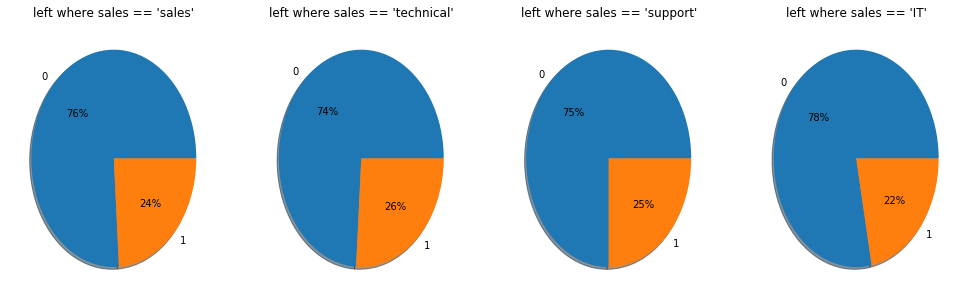

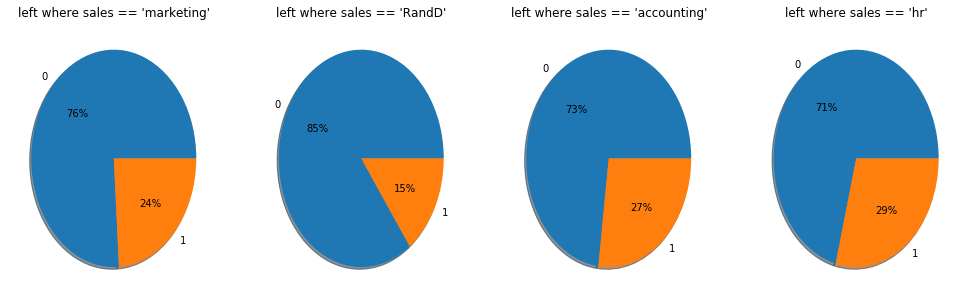

In [6]:
fig, ax = plt.subplots(1,4, figsize=(17,5))

index = data['sales'].value_counts().index

for i,j in enumerate(index[:4]):
    app = data[data['sales'] == j].left.value_counts()/data[data['sales'] == j].left.value_counts().sum()
    fracs = list(np.round(app,2))
    labels = list(app.index)
    ax[i].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True)
    ax[i].set_title("left where sales == \'"+ j +"\'")
plt.show()

fig, ax = plt.subplots(1,4, figsize=(17,5))
index = data['sales'].value_counts().index

for i,j in enumerate(index[5:9]):
    app = data[data['sales'] == j].left.value_counts()/data[data['sales'] == j].left.value_counts().sum()
    fracs = list(np.round(app,2))
    labels = list(app.index)
    ax[i].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True)
    ax[i].set_title("left where sales == \'"+ j +"\'")
plt.show()

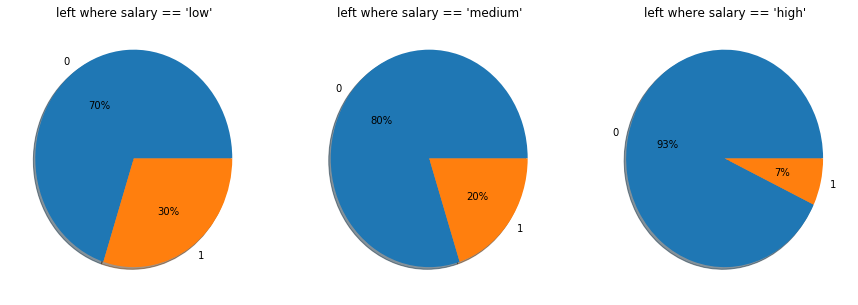

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

index = data['salary'].value_counts().index

for i,j in enumerate(index[:3]):
    app = data[data['salary'] == j].left.value_counts()/data[data['salary'] == j].left.value_counts().sum()
    fracs = list(np.round(app,2))
    labels = list(app.index)
    ax[i].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True)
    ax[i].set_title("left where salary == \'"+ j +"\'")
plt.show()

Now I would like to propose a way to check the distribution of all the variables. 

In this case I used the plot named *violin* plot.

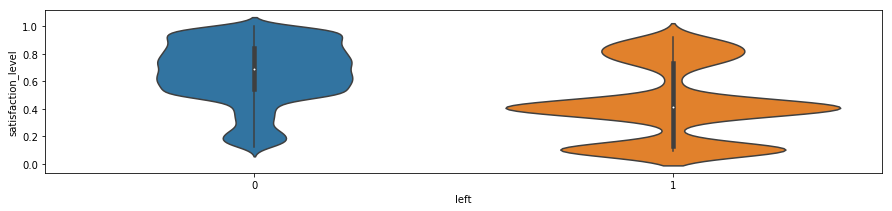

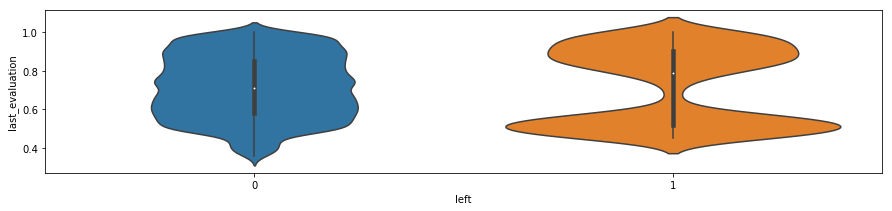

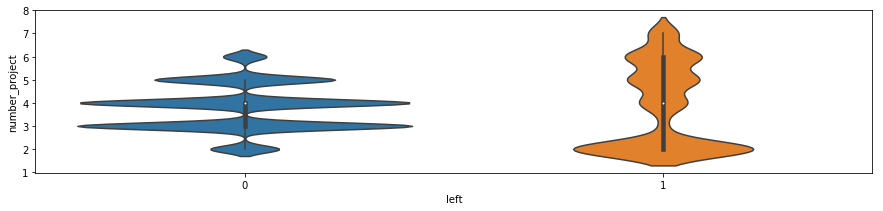

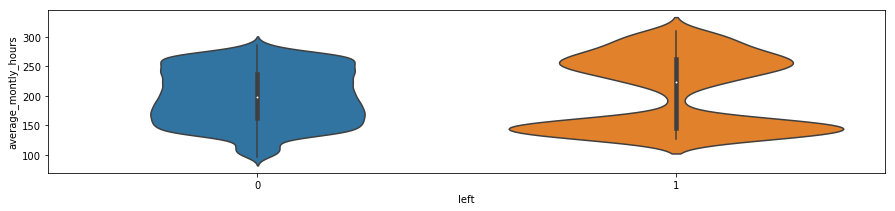

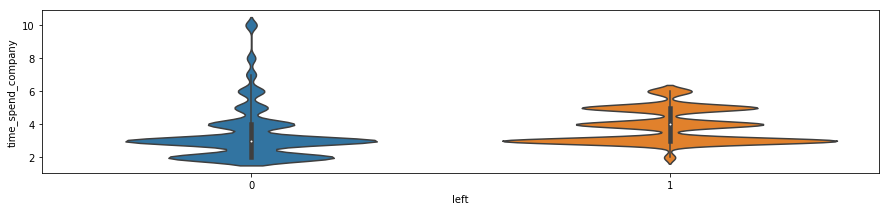

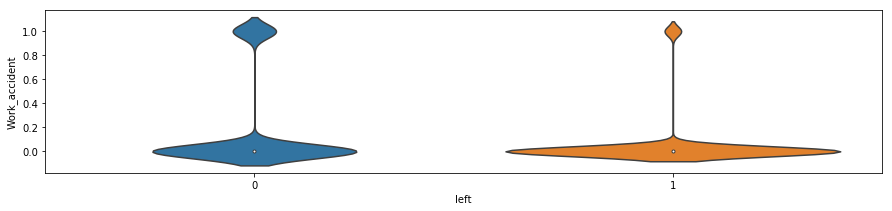

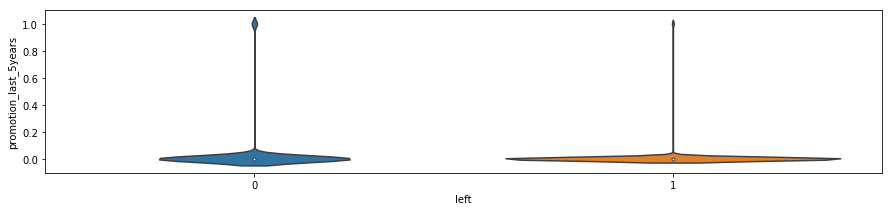

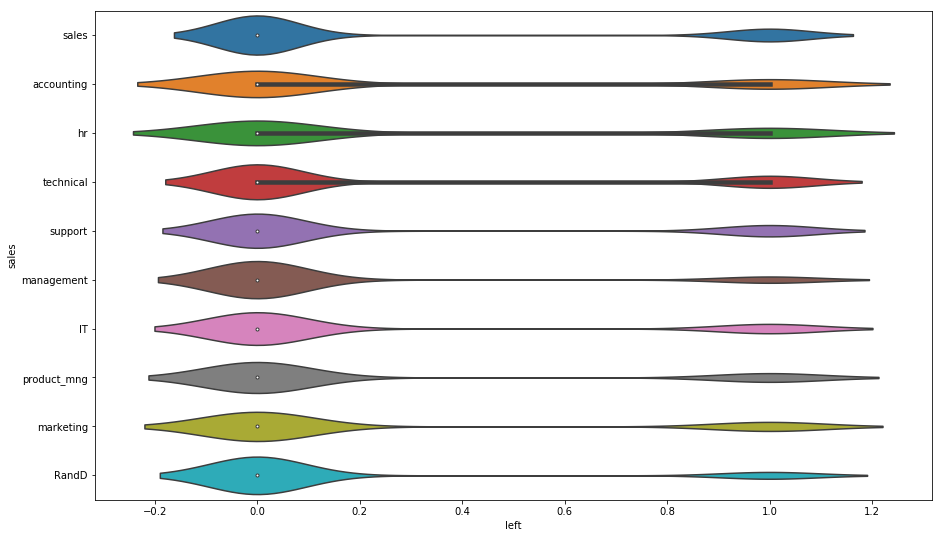

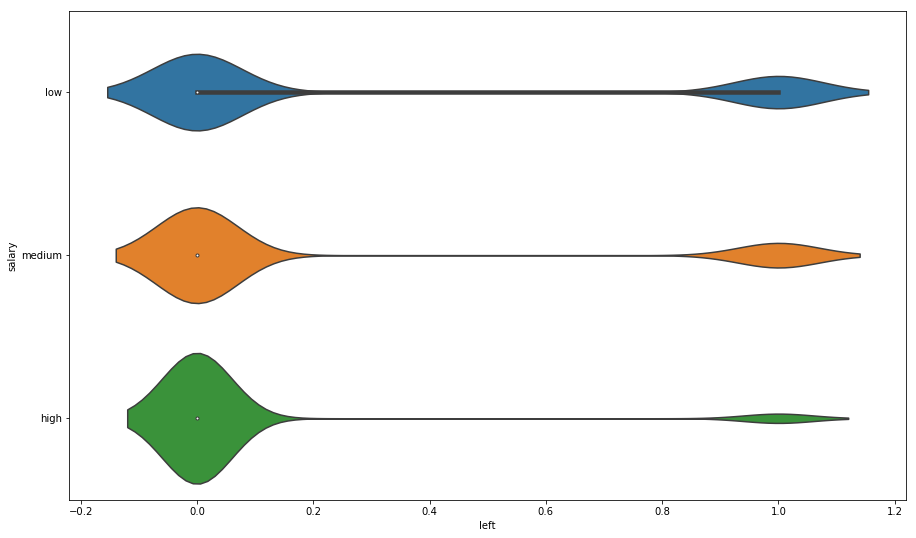

In [8]:
for c in data:
    if c == 'left':
        pass
    elif c == 'sales' or c == 'salary':
        show_violin_bivariate(data, c, 'left', 15, 9)
    else:
        show_violin_bivariate(data, c, 'left', 15, 3)

In [9]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The time for visualization is over. Let's run the model.

**STRATEGY**:
    
    1) dummyfication of categorical variables 
    2) check about class imbalance
    3) run the model

In [10]:
data = pd.concat([data,pd.get_dummies(data['sales']),pd.get_dummies(data['salary'])],axis=1)
y = data.left

In [11]:
data = data.drop(['sales','salary','left'],axis=1)
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [12]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [13]:
y[y == 1].count()/len(y)

0.2380825388359224

The proportion of 1s equals 24%. In theory this is not a balanced dataset but the situation is not so tragic. 

The scope of this notebook is not to manage imbalanced datasets. I've already posted a tutorial on imbalanced datasets.
You can find it here http://nbviewer.jupyter.org/github/frucci/2017/blob/master/imbalanced_classification_tutorial_pt1_logistic.ipynb

Let's run the model!

N.B. XGBoost requires a tuning! You can find a tuning guide here https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

**P.S. The tuning I'll propose is quite naive! :)**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=0)

In [15]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.3
params['max_depth'] = 3
params['min_child_weight'] = 30
params['eval_metric'] = 'auc'

clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=25, verbose_eval=50)

[0]	train-auc:0.962954	valid-auc:0.96655
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 25 rounds.
[50]	train-auc:0.98791	valid-auc:0.985479
[100]	train-auc:0.990205	valid-auc:0.986685
Stopping. Best iteration:
[114]	train-auc:0.990686	valid-auc:0.987069



In [16]:
comparison = pd.DataFrame(y_test).reset_index(drop=True)
comparison = pd.concat([comparison, pd.DataFrame(clf.predict(d_test))], axis=1)
comparison.columns = ['y_true','y_pred']

In [17]:
y_pred = np.array(comparison['y_pred']>0.5,dtype=int)

Normalized confusion matrix
[[ 0.98873484  0.01126516]
 [ 0.07707129  0.92292871]]


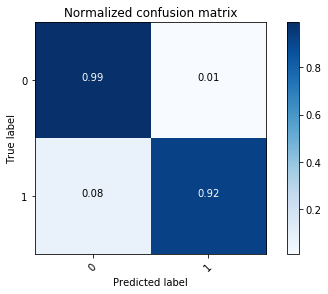

Precision: 0.96
Recall: 0.92
F1-Score: 0.94

Accuracy: 0.9736




In [18]:
v.show_confusion_matrix(comparison['y_true'],y_pred,classes=[0,1], normalize=True,
                      title='Normalized confusion matrix',col=True)

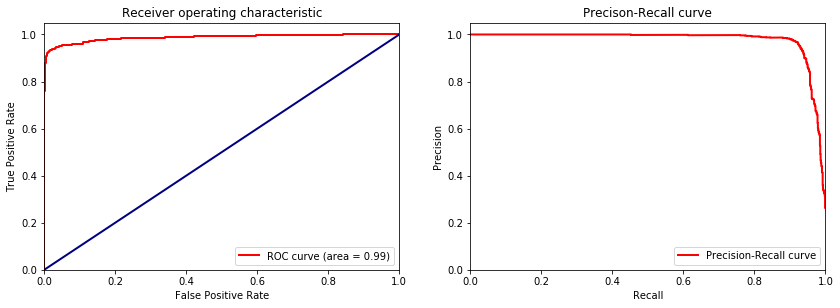

In [19]:
v.show_ROC_PrecisionRecall(comparison.y_true,comparison.y_pred)

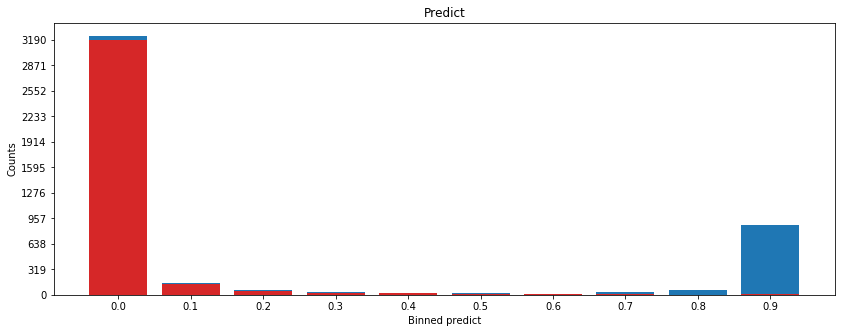

In [20]:
v.show_binned_predict_binaryclassification(comparison.y_true,comparison.y_pred,10)

This is too easy! I forgot to create a blind portion of the dataset as test and I evaluate the model on validation set. This is wrong!

Let's do it in the correct way.

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=0)

In [22]:
print("This dataset is composed by {} rows\n\n".format(data.shape[0]))
print('Now we have:"\n')
print("{} rows inside the train dataset".format(X_train.shape[0]))
print("{} rows inside the valid dataset".format(X_valid.shape[0]))
print("{} rows inside the blind test dataset".format(X_test.shape[0]))

This dataset is composed by 14999 rows


Now we have:"

8999 rows inside the train dataset
3000 rows inside the valid dataset
3000 rows inside the blind test dataset


In [23]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)
d_test = xgb.DMatrix(X_test)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.3
params['max_depth'] = 3
params['min_child_weight'] = 30
params['eval_metric'] = 'auc'

clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=25, verbose_eval=50)

[0]	train-auc:0.931939	valid-auc:0.928507
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 25 rounds.
[50]	train-auc:0.987363	valid-auc:0.983351
[100]	train-auc:0.990122	valid-auc:0.984439
[150]	train-auc:0.991675	valid-auc:0.984845
Stopping. Best iteration:
[170]	train-auc:0.992189	valid-auc:0.98549



In [24]:
prediction_test = clf.predict(d_test)

Normalized confusion matrix
[[ 0.98875433  0.01124567]
 [ 0.08866279  0.91133721]]


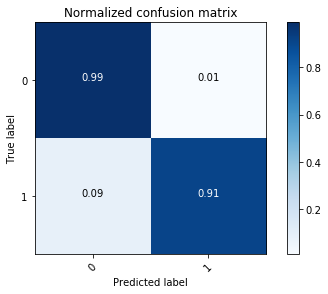

Precision: 0.96
Recall: 0.91
F1-Score: 0.94

Accuracy: 0.971




In [25]:
v.show_confusion_matrix(y_test,np.array(prediction_test>0.5,dtype=int),classes=[0,1], normalize=True,
                      title='Normalized confusion matrix',col=True)

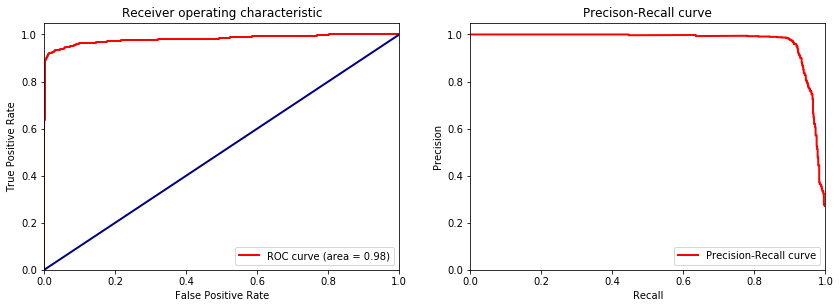

In [26]:
v.show_ROC_PrecisionRecall(y_test,prediction_test)

Can you image the effect of this algorithm?

Let's play.

In [27]:
X_test.iloc[0]

satisfaction_level         0.83
last_evaluation            0.51
number_project             4.00
average_montly_hours     199.00
time_spend_company         3.00
Work_accident              0.00
promotion_last_5years      0.00
IT                         0.00
RandD                      0.00
accounting                 0.00
hr                         0.00
management                 0.00
marketing                  0.00
product_mng                0.00
support                    1.00
technical                  0.00
high                       0.00
low                        1.00
medium                     0.00
Name: 9519, dtype: float64

This is an employee. Can you say if he is going to leave or not?

I do.

In [28]:
clf.predict(xgb.DMatrix(pd.DataFrame(X_test.iloc[0]).T))[0]

0.00079299009

His probability is almost zero!

We are right! 

In [29]:
y_test.iloc[0]

0

This was too easy. This dataset was simulated and I have no idea about how it was simulated. I really do not know if this dataset could be considerated realistic or not.

## CONCLUSION

This notebook is a starter for XGBoost in binary classification task.

I've showed some basic instruments for data visualization as well as a model that seems to be a good classifier here.

If you enjoy this first notebook I promise I'll show you in the future other solutions about tasks regarding HR analytics. So, if you liked it: comment, share, like, text me, everything and...**stay tuned!**

#### Be free to contact my for new points of view as well as advices.
#### I hope you appreciate this notebook,
#### See you around,
#### Federico